In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

39232


In [2]:
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size
plt.style.use('dark_background')


In [3]:
figure_folder = r'D:\20220626-Plots'
distmap_figure_folder = os.path.join(figure_folder, 'Celltype_Distmap')
if not os.path.exists(distmap_figure_folder):
    os.makedirs(distmap_figure_folder)

In [4]:
import pandas as pd
codebook = pd.read_csv(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\merged_codebook_w_celltype.csv')
bit_columns = [_n for _n in codebook.columns if 'NDB' in _n]

In [5]:
median_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_class_2_summary_dict_nonnan100',
                    allow_pickle=True)
count_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_class_2_len.pkl',
                    allow_pickle=True)

<IPython.core.display.Javascript object>


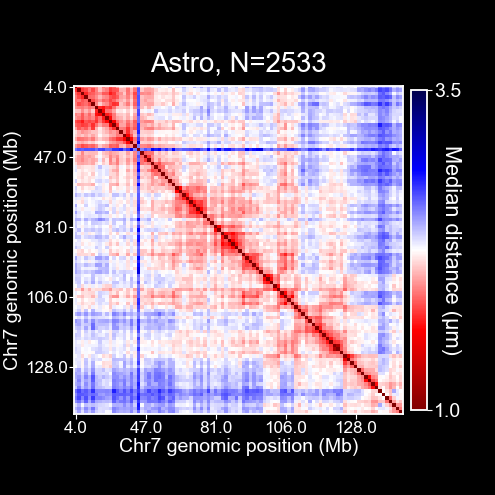

<IPython.core.display.Javascript object>


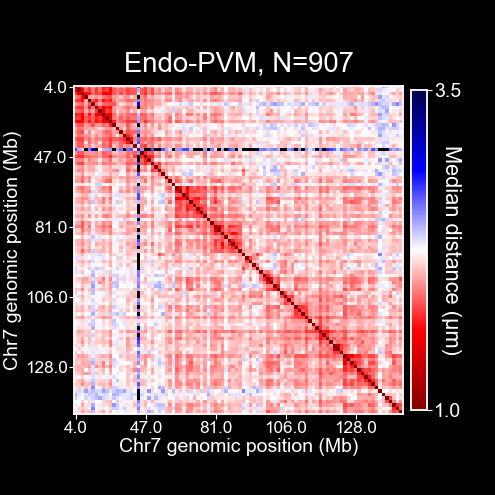

<IPython.core.display.Javascript object>


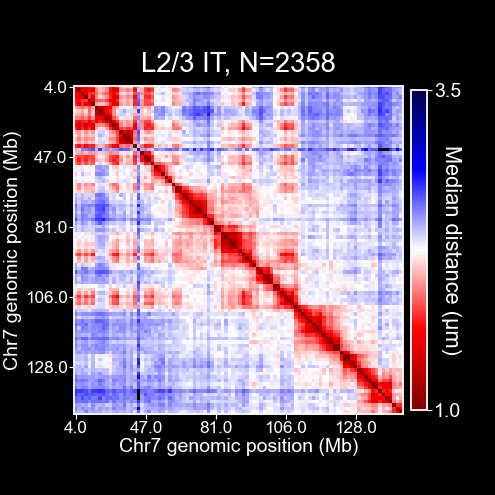

<IPython.core.display.Javascript object>


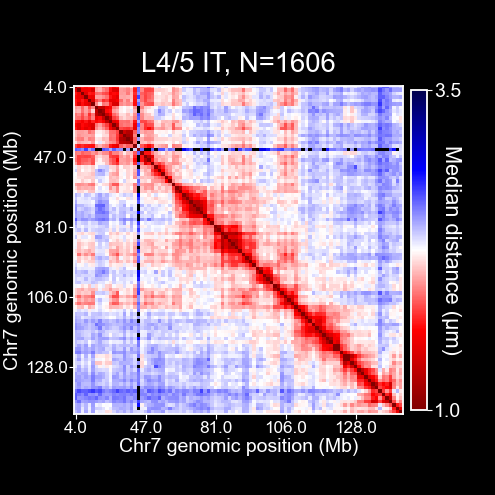

<IPython.core.display.Javascript object>


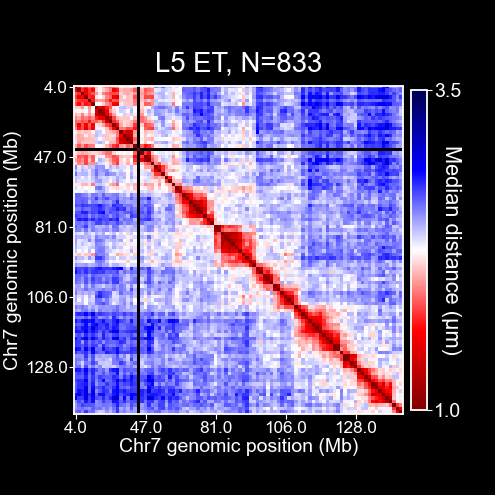

<IPython.core.display.Javascript object>


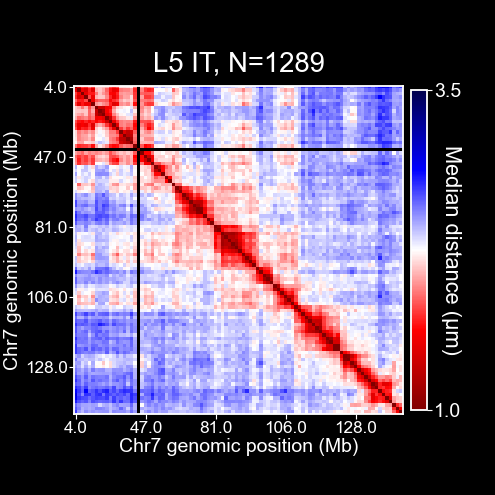

<IPython.core.display.Javascript object>


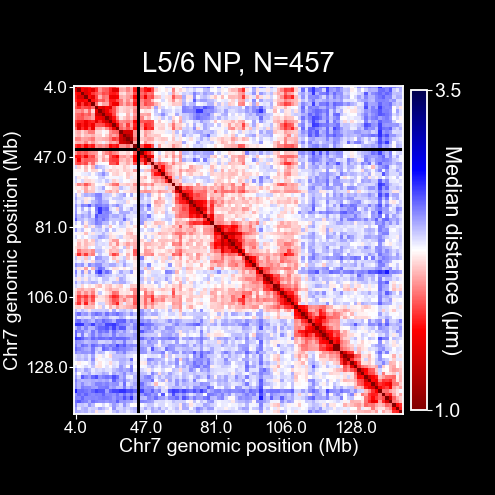

<IPython.core.display.Javascript object>


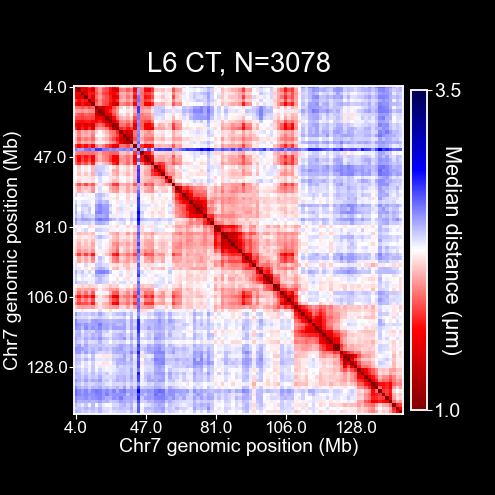

<IPython.core.display.Javascript object>


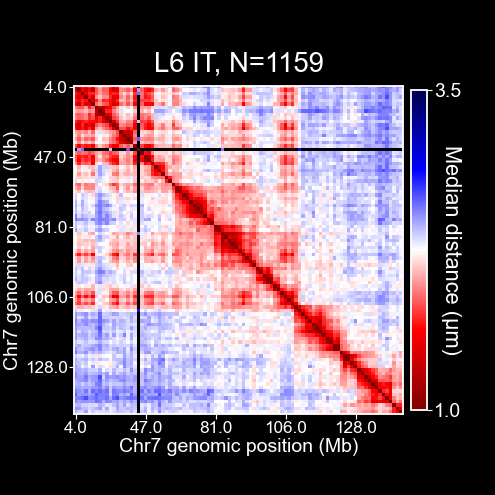

<IPython.core.display.Javascript object>


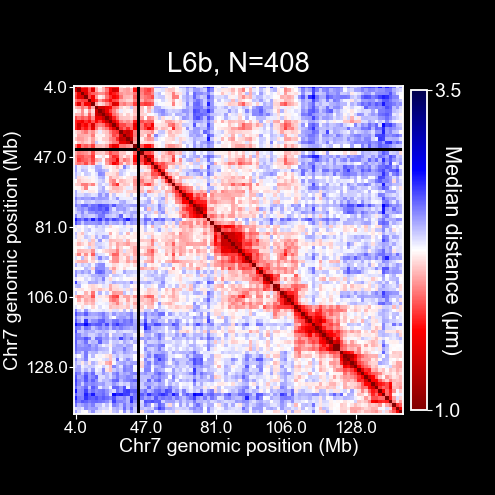

<IPython.core.display.Javascript object>


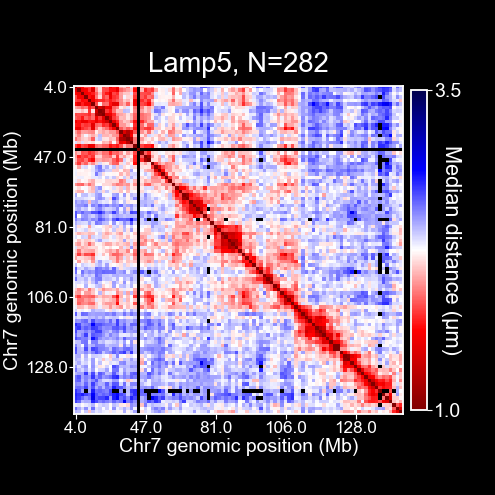

<IPython.core.display.Javascript object>


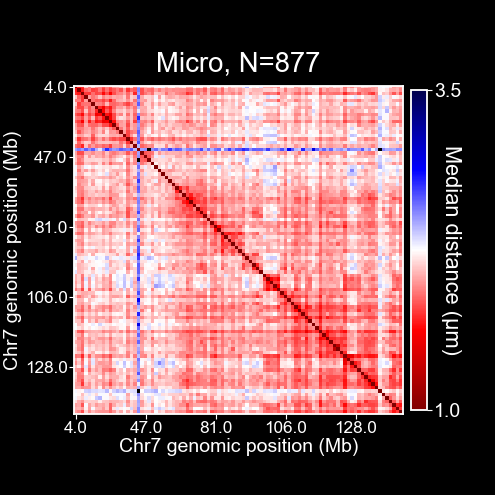

<IPython.core.display.Javascript object>


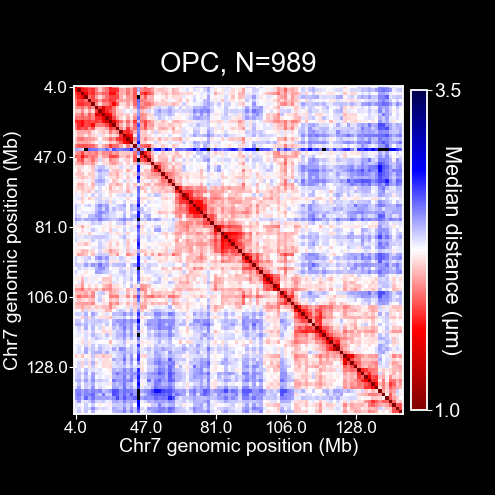

<IPython.core.display.Javascript object>


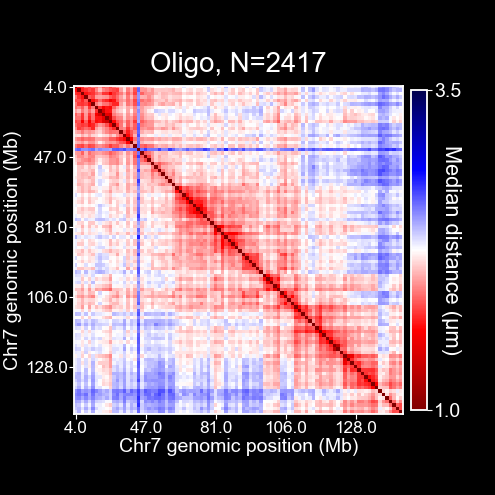

<IPython.core.display.Javascript object>


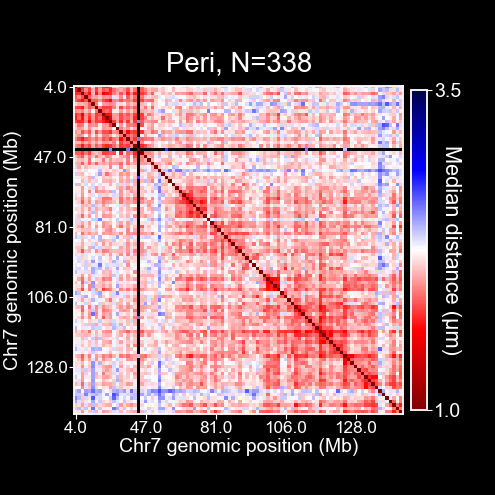

<IPython.core.display.Javascript object>


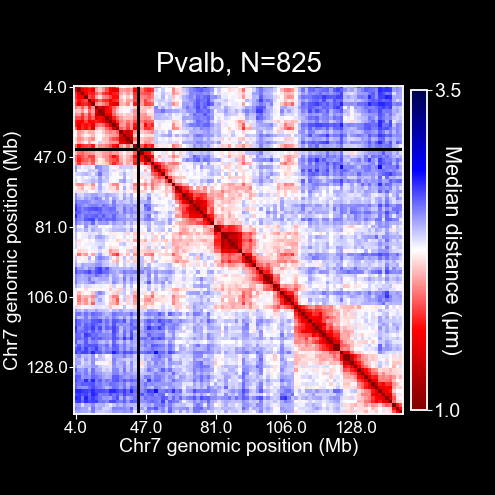

C:\Users\puzheng\AppData\Local\Temp/ipykernel_23392/1395342415.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, _ax = plt.subplots(figsize=(3,3), dpi=150)


<IPython.core.display.Javascript object>


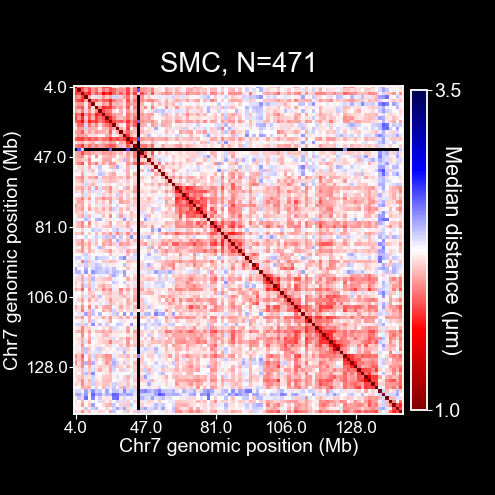

<IPython.core.display.Javascript object>


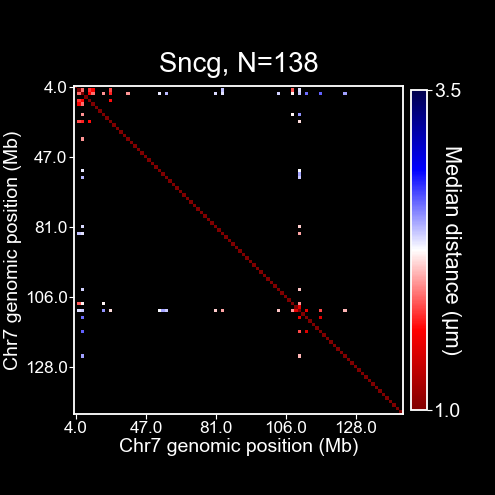

<IPython.core.display.Javascript object>


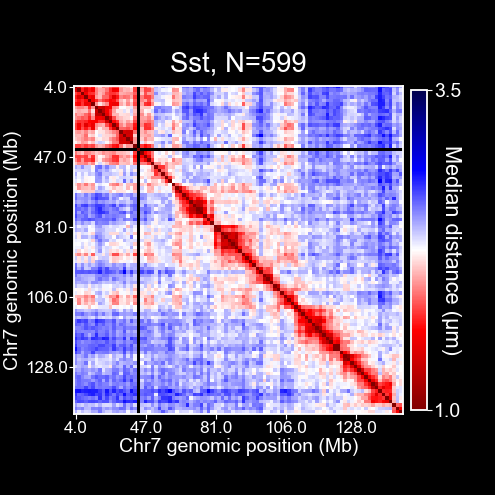

<IPython.core.display.Javascript object>


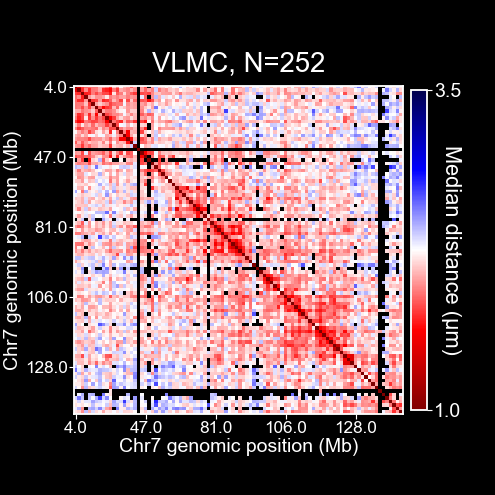

<IPython.core.display.Javascript object>


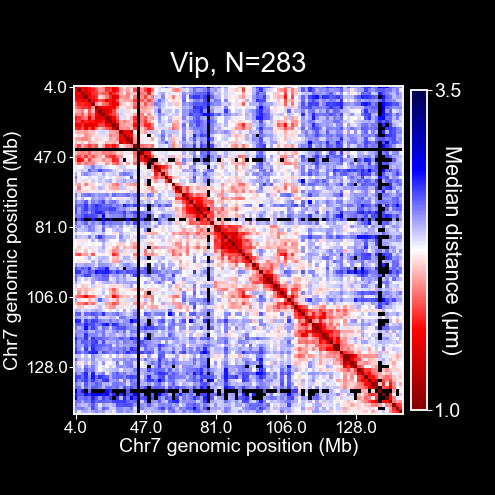

<IPython.core.display.Javascript object>


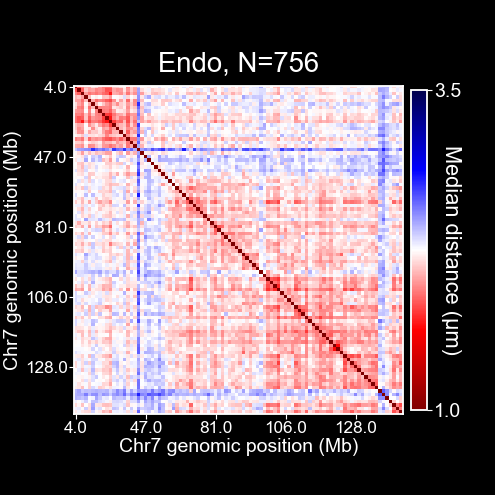

In [59]:
sel_feature = 'cis_7'
c1,c2 = 7,7
_font_size = 7.5
vmin,vmax = 1, 3.5
c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 20)
c2_ticks = np.arange(0, len(c2_codebook), 20)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

for _type, _ChrPair_2_Summary in median_dict.items():
    _mat = _ChrPair_2_Summary[sel_feature]/1000
    fig, _ax = plt.subplots(figsize=(3,3), dpi=150)

    _pf = _ax.imshow(_mat, cmap='seismic_r', vmin=vmin, vmax=vmax)
    # get ticks
    _ax.set_yticks(c1_ticks)
    _ax.set_yticklabels(c1_starts[c1_ticks])
    _ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.set_xticks(c2_ticks)
    _ax.set_xticklabels(c2_starts[c2_ticks])
    _ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    _ax.set_title(f"{_type}, N={count_dict[_type]}")
    cbar = plt.colorbar(_pf, ax=_ax, shrink=0.84, ticks=[vmin,vmax], pad=0.02)
    cbar.set_label('Median distance (\u03BCm)', 
                   fontsize=_font_size+2, labelpad=0, rotation=270)
    cbar.ax.tick_params('both', labelsize=_font_size+1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    plt.gcf().subplots_adjust(left=0.15,right=0.95)
    # save pdf and png
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_{_type.replace(' ', '_').replace(r'/', '-')}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_{_type.replace(' ', '_').replace(r'/', '-')}.png"),
                transparent=True)
    fig.show()
    

# Major classes

In [6]:
median_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_summary_dict_nonnan100',
                    allow_pickle=True)
count_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_len.pkl',
                    allow_pickle=True)

<IPython.core.display.Javascript object>


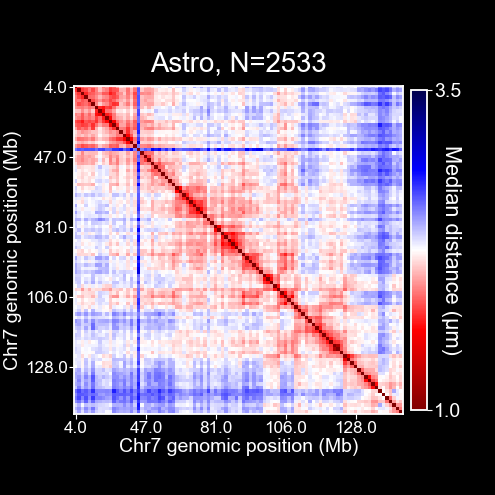

<IPython.core.display.Javascript object>


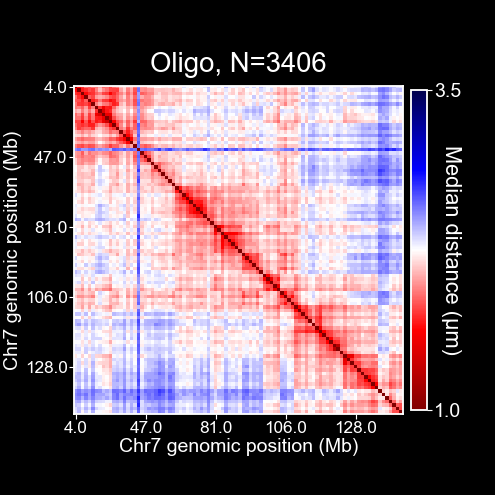

<IPython.core.display.Javascript object>


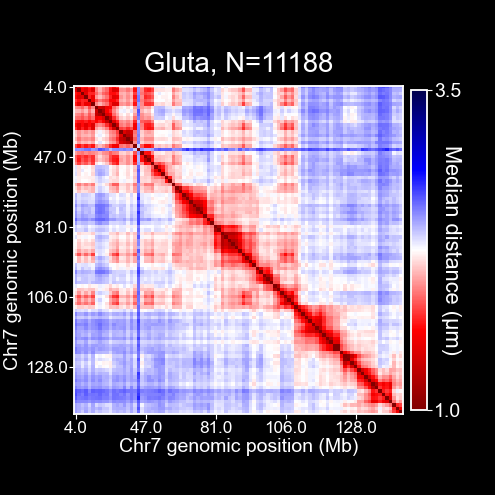

<IPython.core.display.Javascript object>


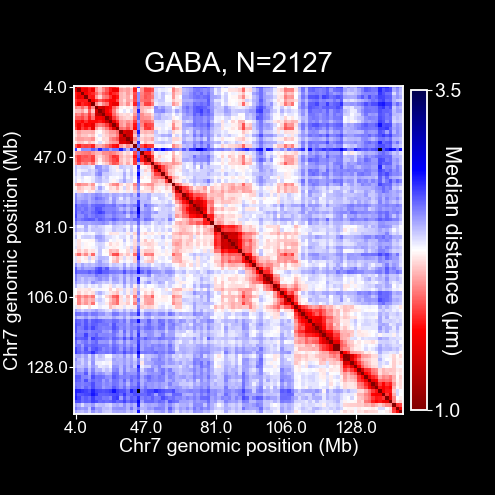

In [57]:
sel_feature = 'cis_7'
c1,c2 = 7,7
_font_size = 7.5
vmin,vmax = 1, 3.5
c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 20)
c2_ticks = np.arange(0, len(c2_codebook), 20)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

for _type, _ChrPair_2_Summary in median_dict.items():
    _mat = _ChrPair_2_Summary[sel_feature]/1000
    fig, _ax = plt.subplots(figsize=(3,3), dpi=150)

    _pf = _ax.imshow(_mat, cmap='seismic_r', vmin=vmin, vmax=vmax)
    # get ticks
    _ax.set_yticks(c1_ticks)
    _ax.set_yticklabels(c1_starts[c1_ticks])
    _ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.set_xticks(c2_ticks)
    _ax.set_xticklabels(c2_starts[c2_ticks])
    _ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    _ax.set_title(f"{_type}, N={count_dict[_type]}")
    cbar = plt.colorbar(_pf, ax=_ax, shrink=0.84, ticks=[vmin,vmax], pad=0.02)
    cbar.set_label('Median distance (\u03BCm)', 
                   fontsize=_font_size+2, labelpad=0, rotation=270)
    cbar.ax.tick_params('both', labelsize=_font_size+1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    plt.gcf().subplots_adjust(left=0.15,right=0.95)
    # save pdf and png
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_Major4_{_type.replace(' ', '_').replace(r'/', '-')}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_Major4_{_type.replace(' ', '_').replace(r'/', '-')}.png"),
                transparent=True)
    fig.show()


## Plot all trans

In [7]:
median_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_summary_dict_nonnan100',
                    allow_pickle=True)
count_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_len.pkl',
                    allow_pickle=True)

In [11]:
from ImageAnalysis3.structure_tools.distance import assemble_ChrDistDict_2_Matrix
reload(ia.structure_tools.distance)

<module 'ImageAnalysis3.structure_tools.distance' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\structure_tools\\distance.py'>

Astro


<IPython.core.display.Javascript object>


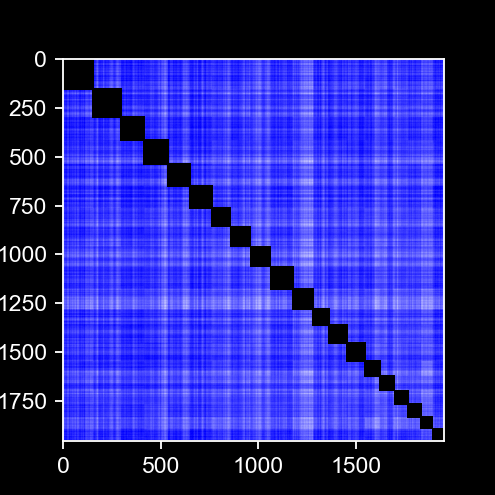

Oligo


<IPython.core.display.Javascript object>


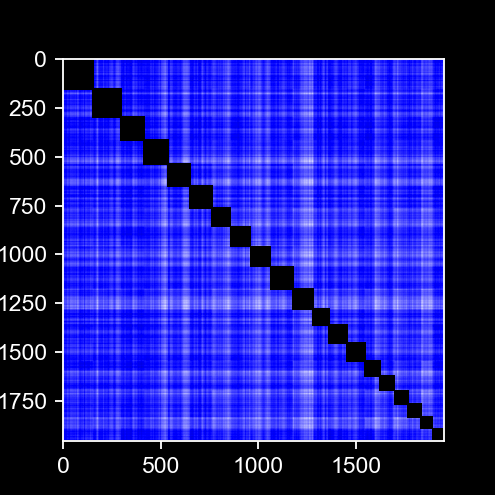

Gluta


<IPython.core.display.Javascript object>


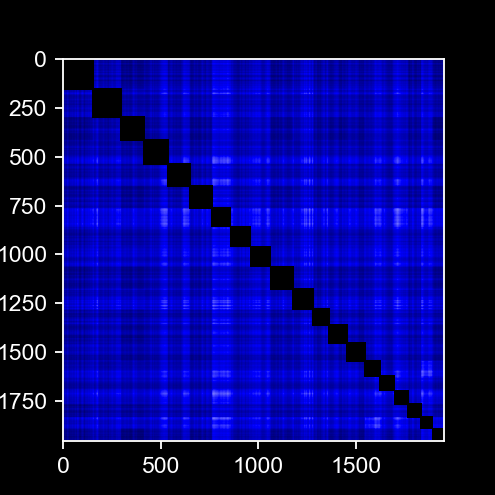

GABA


<IPython.core.display.Javascript object>


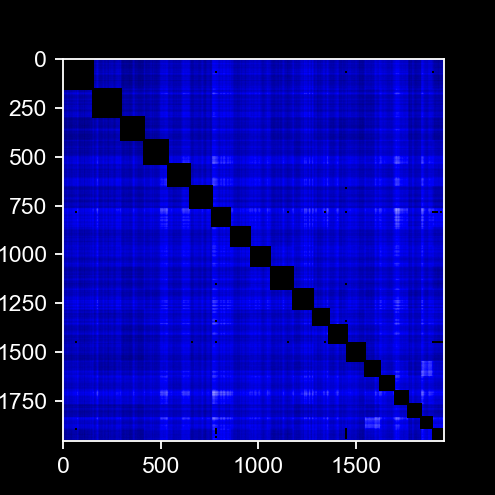

In [18]:
vmin,vmax = 3, 6

for _type, _chrDistDict in median_dict.items():
    print(_type)
    _mat, _chr_edges, _chr_names = assemble_ChrDistDict_2_Matrix(_chrDistDict, codebook, use_cis=False, use_trans=False, sort_by_region=False)
    _mat = _mat / 1000
    fig, _ax = plt.subplots(figsize=(3,3), dpi=150)

    _pf = _ax.imshow(_mat, cmap='seismic_r', vmin=0, vmax=vmax)
    fig.show()


<IPython.core.display.Javascript object>


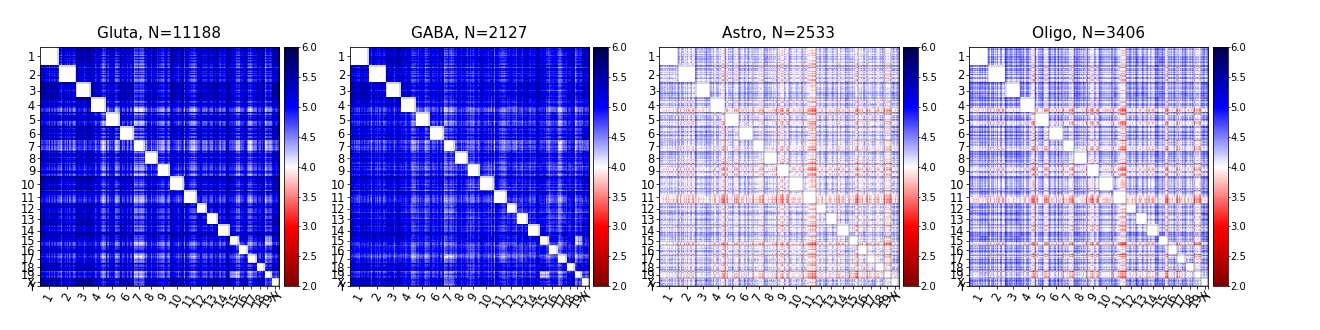

In [33]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('dark_background')
plt.style.use('default')

keys = ['Gluta', 'GABA', 'Astro', 'Oligo']

num_x = 1
num_y = len(keys)
im_size = 3

vmin = 4e-3
vmax = 2e-1

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

fig, axes = plt.subplots(num_x,num_y, figsize=(im_size*num_y,im_size*num_x), 
                         sharex=True, sharey=True, dpi=100)

for _i, _ax in enumerate(axes):
    _key = keys[_i]
    _mat, _chr_edges, _chr_names = assemble_ChrDistDict_2_Matrix(
        median_dict[_key], codebook, use_cis=False, use_trans=False, sort_by_region=False)
    _mat = _mat / 1000
    
    ia.figure_tools.distmap.plot_distance_map(_mat, color_limits=[2,6],
                                              ax=_ax, 
                                              ticks=(_chr_edges[1:] + _chr_edges[:-1])/2,
                                              tick_labels=_chr_names,
                                              font_size=6.5)
    # Lines between chr
    _ax.hlines(_chr_edges-0.5, 0, len(_mat), color='black', linewidth=0.2)
    _ax.vlines(_chr_edges-0.5, 0, len(_mat), color='black', linewidth=0.2)
    _ax.xaxis.set_tick_params(which='both', labelbottom=True)
    _ax.yaxis.set_tick_params(which='both', labelleft=True)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    # title
    _ax.set_title(f"{_key}, N={count_dict[_key]}", fontsize=_font_size+2.5)
    
fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.03, right=0.93, top=0.97, bottom=0.02)
fig.savefig(os.path.join(figure_folder, f'median_trans_4types.png'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'median_trans_4types.pdf'), transparent=True, dpi=300)

plt.show()

<IPython.core.display.Javascript object>


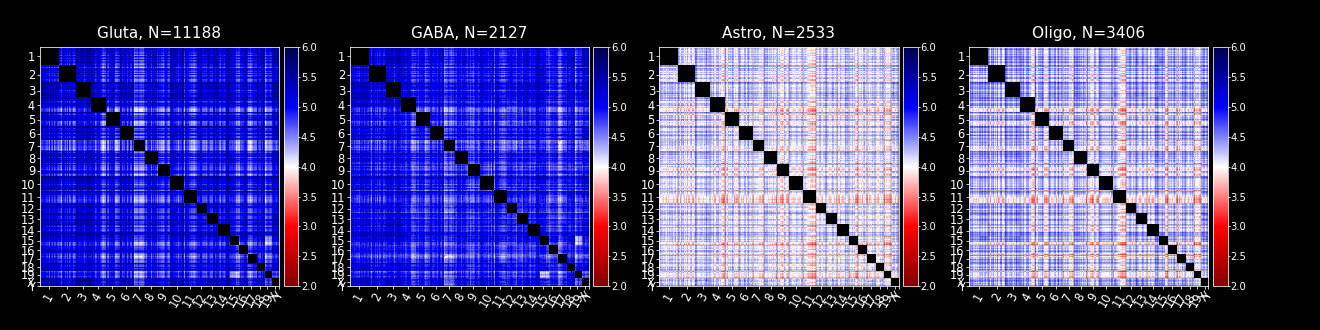

In [34]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('dark_background')

keys = ['Gluta', 'GABA', 'Astro', 'Oligo']

num_x = 1
num_y = len(keys)
im_size = 3

vmin = 4e-3
vmax = 2e-1

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

fig, axes = plt.subplots(num_x,num_y, figsize=(im_size*num_y,im_size*num_x), 
                         sharex=True, sharey=True, dpi=100)

for _i, _ax in enumerate(axes):
    _key = keys[_i]
    _mat, _chr_edges, _chr_names = assemble_ChrDistDict_2_Matrix(
        median_dict[_key], codebook, use_cis=False, use_trans=False, sort_by_region=False)
    _mat = _mat / 1000
    
    ia.figure_tools.distmap.plot_distance_map(_mat, color_limits=[2,6],
                                              ax=_ax, 
                                              ticks=(_chr_edges[1:] + _chr_edges[:-1])/2,
                                              tick_labels=_chr_names,
                                              font_size=6.5)
    # Lines between chr
    _ax.hlines(_chr_edges-0.5, 0, len(_mat), color='black', linewidth=0.2)
    _ax.vlines(_chr_edges-0.5, 0, len(_mat), color='black', linewidth=0.2)
    _ax.xaxis.set_tick_params(which='both', labelbottom=True)
    _ax.yaxis.set_tick_params(which='both', labelleft=True)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    # title
    _ax.set_title(f"{_key}, N={count_dict[_key]}", fontsize=_font_size+2.5)
    
fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.03, right=0.93, top=0.97, bottom=0.02)
fig.savefig(os.path.join(figure_folder, f'median_trans_4types_dark.png'), transparent=True, dpi=300)

plt.show()

# change median to contact

In [35]:
contact_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_summary_dict_nonnan100_contact600',
                    allow_pickle=True)

<IPython.core.display.Javascript object>


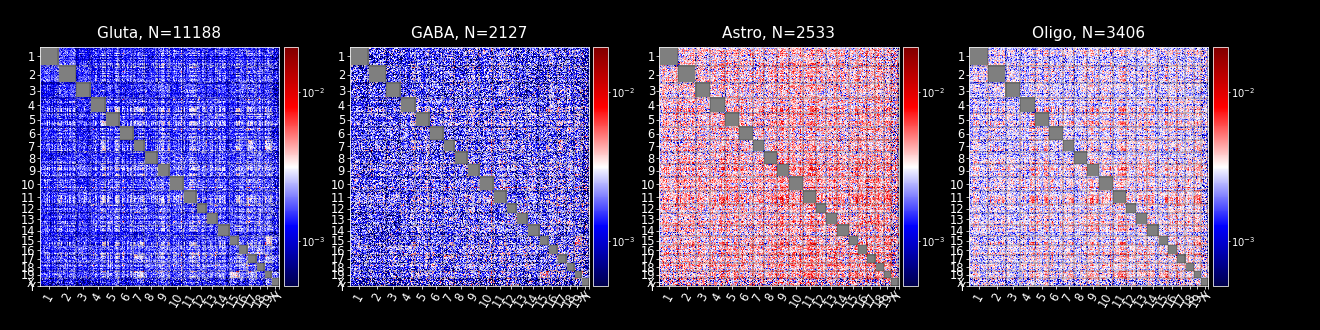

E:\Users\puzheng\Documents\ImageAnalysis3\figure_tools\distmap.py:41: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _im = ax.imshow(_distmap, cmap=cmap, interpolation='nearest', norm=color_norm,


In [330]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
plt.style.use('dark_background')

keys = ['Gluta', 'GABA', 'Astro', 'Oligo']

num_x = 1
num_y = len(keys)
im_size = 3

vmin = 5e-4
vmax = 2e-2

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

fig, axes = plt.subplots(num_x,num_y, figsize=(im_size*num_y,im_size*num_x), 
                         sharex=True, sharey=True, dpi=100)

for _i, _ax in enumerate(axes):
    _key = keys[_i]
    _mat, _chr_edges, _chr_names = assemble_ChrDistDict_2_Matrix(
        contact_dict[_key], codebook, use_cis=False, use_trans=False, sort_by_region=False)
    
    ia.figure_tools.distmap.plot_distance_map(_mat, color_limits=[vmin,vmax],
                                              color_norm=LogNorm(), cmap='seismic',
                                              ax=_ax, 
                                              ticks=(_chr_edges[1:] + _chr_edges[:-1])/2,
                                              tick_labels=_chr_names,
                                              font_size=6.5)
    # Lines between chr
    _ax.hlines(_chr_edges-0.5, 0, len(_mat), color='black', linewidth=0.2)
    _ax.vlines(_chr_edges-0.5, 0, len(_mat), color='black', linewidth=0.2)
    _ax.xaxis.set_tick_params(which='both', labelbottom=True)
    _ax.yaxis.set_tick_params(which='both', labelleft=True)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    # title
    _ax.set_title(f"{_key}, N={count_dict[_key]}", fontsize=_font_size+2.5)
    
fig.subplots_adjust(wspace=0.2, hspace=0.2, left=0.03, right=0.93, top=0.97, bottom=0.02)
fig.savefig(os.path.join(figure_folder, f'contact_trans_4types_dark.png'), transparent=True, dpi=300)

plt.show()

In [105]:
sort_by_region = False
from ImageAnalysis3.structure_tools import distance

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=sort_by_region)

In [47]:
_mat, _chr_edges, _chr_names = assemble_ChrDistDict_2_Matrix(
    contact_dict['Gluta'], codebook, use_cis=False, use_trans=False, sort_by_region=False)


In [145]:
_normed_mat = _mat.copy()
chr_2_meanContact = {}
for _chr,_inds in chr_2_indices.items():
    chr_2_meanContact[_chr] = np.nanmean(_mat[_inds])
    _normed_mat[_inds] *= 1 / chr_2_meanContact[_chr]
    _normed_mat[:,_inds] *= 1 / chr_2_meanContact[_chr]
_normed_mat = _normed_mat / np.nanmean(_normed_mat)
# correlation
_mat_df = pd.DataFrame(_normed_mat)
mat_corr_df = _mat_df.corr()

C:\Users\puzheng\AppData\Local\Temp/ipykernel_39232/2701657070.py:4: RuntimeWarning: Mean of empty slice
  chr_2_meanContact[_chr] = np.nanmean(_mat[_inds])


<IPython.core.display.Javascript object>


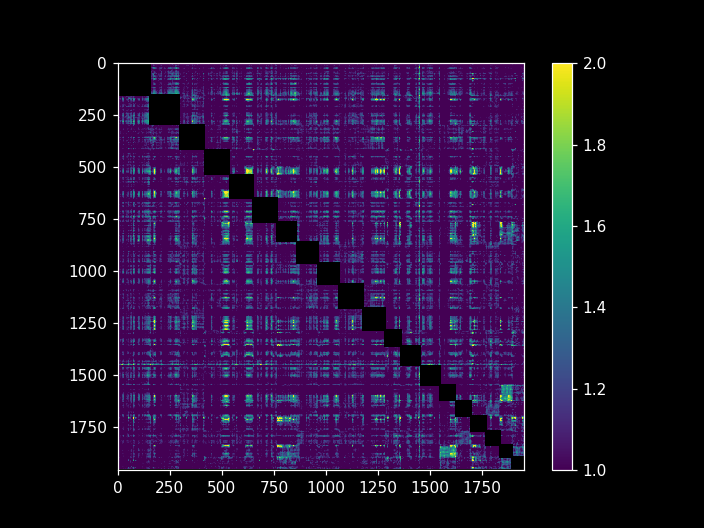

In [150]:
plt.figure()
plt.imshow(_normed_mat, vmin=1, vmax=2)
plt.colorbar()

In [ ]:
def CompartmentCallingbyContactMat(contact_mat, )

In [358]:
from scipy.ndimage import gaussian_filter
from ImageAnalysis3.structure_tools.distance import assemble_ChrDistDict_2_Matrix
import astropy.convolution
from sklearn.decomposition import PCA

_mat, _chr_edges, _chr_names = assemble_ChrDistDict_2_Matrix(
    contact_dict['Gluta'], codebook, use_cis=False, use_trans=False, sort_by_region=False)

_normed_mat = _mat.copy()
chr_2_meanContact = {}
for _chr,_inds in chr_2_indices.items():
    chr_2_meanContact[_chr] = np.nanmean(_mat[_inds])
    _normed_mat[_inds] *= 1 / chr_2_meanContact[_chr]
    _normed_mat[:,_inds] *= 1 / chr_2_meanContact[_chr]
_normed_mat = _normed_mat / np.nanmean(_normed_mat)
# correlation
_mat_df = pd.DataFrame(_normed_mat)
mat_corr_df = _mat_df.corr()

# norm corr_mat
_corr_mat = mat_corr_df.values[:-1,:-1]
_corr_mat[np.diag_indices(len(_corr_mat))] = np.nan

# gaussian blur
contact_gaussian_sigma = 0.5
_ft_corr_mat = astropy.convolution.convolve(_corr_mat, astropy.convolution.Gaussian2DKernel(contact_gaussian_sigma))
# Do PCA
# parameters used for PCA compartment calling

# PCA
contact_model = PCA(3)
contact_model.fit(_ft_corr_mat)
#p_contact_pc1_rep1 = np.reshape(contact_model.fit_transform(p_contact_corr_rep1_map), -1)
pcs = contact_model.fit_transform(_ft_corr_mat)
# normalize pc1 values
pc_vals = -1 * pcs[:,0]
normed_pc_vals = pc_vals.copy()
# normalize pcval
for _chr, _inds in chr_2_indices.items():
    if _chr == 'Y':
        continue
    normed_pc_vals[_inds] = normed_pc_vals[_inds] - np.nanmean(pc_vals[_inds])
    
# define AB
AB_dict = {}
AB_th = 0.5
AB_dict['A'] = np.where(normed_pc_vals > AB_th)[0]
AB_dict['B'] = np.where(normed_pc_vals <= AB_th)[0]

C:\Users\puzheng\AppData\Local\Temp/ipykernel_39232/2406176090.py:12: RuntimeWarning: Mean of empty slice
  chr_2_meanContact[_chr] = np.nanmean(_mat[_inds])


In [236]:
# norm corr_mat
from scipy.ndimage import gaussian_filter
_corr_mat = mat_corr_df.values[:-1,:-1]
_corr_mat[np.diag_indices(len(_corr_mat))] = np.nan
_ft_corr_mat = gaussian_filter(_corr_mat.copy(), contact_gaussian_sigma)

In [353]:
# Do PCA
from sklearn.decomposition import PCA
# parameters used for PCA compartment calling

# PCA

contact_model = PCA(3)
contact_model.fit(_ft_corr_mat)
#p_contact_pc1_rep1 = np.reshape(contact_model.fit_transform(p_contact_corr_rep1_map), -1)
pcs = contact_model.fit_transform(_ft_corr_mat)



<IPython.core.display.Javascript object>


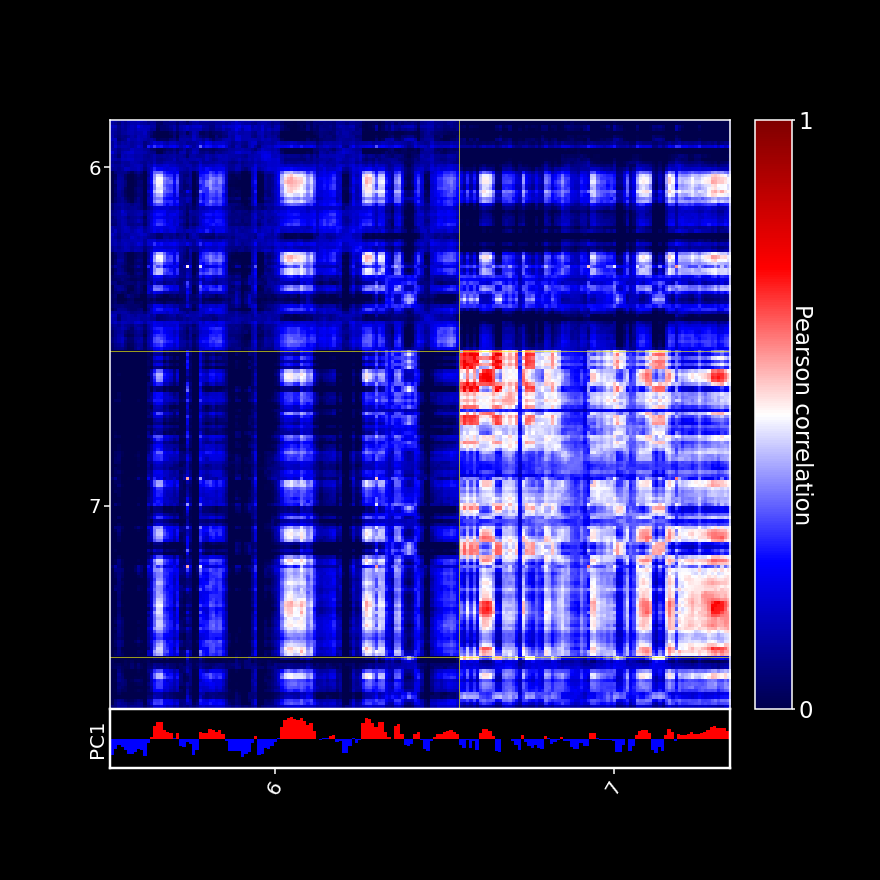

C:\Users\puzheng\AppData\Local\Temp/ipykernel_39232/2716491489.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("seismic").copy()
  current_cmap.set_bad(color=[0.5,0.5,0.5,1])


In [357]:
from matplotlib import cm
plt.style.use('dark_background')
#plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(4,4), dpi=200)

# create a color map
current_cmap = cm.get_cmap('seismic')
current_cmap.set_bad(color=[0.5,0.5,0.5,1])



vmin,vmax = 0,1

_pf = ax1.imshow(_ft_corr_mat, 
                 cmap=current_cmap, vmin=vmin, vmax=vmax)

ax1.set_yticks((_chr_edges[1:] + _chr_edges[:-1])/2,)
ax1.set_yticklabels(_chr_names,)

#                                              ticks=
#                                              tick_labels=_chr_names,

ax1.hlines(_chr_edges-0.5, 0, len(_mat), color='yellow', linewidth=0.2)
ax1.vlines(_chr_edges-0.5, 0, len(_mat), color='yellow', linewidth=0.2)
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([0, len(_mat)])
ax1.set_ylim([len(_mat), 0])

ax1.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[vmin,vmax])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Pearson correlation', 
               fontsize=_font_size, labelpad=0, rotation=270)

# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=[])
#bot_ax.bar(AB_dict['A'], height=1, color='r', width=1, label='A')
#bot_ax.bar(AB_dict['B'], height=-1, color='b', width=1, label='B')
bot_ax.bar(AB_dict['A'], normed_pc_vals[AB_dict['A']], color='r',width=1)
bot_ax.bar(AB_dict['B'], normed_pc_vals[AB_dict['B']], color='b',width=1)

bot_ax.set_xticks((_chr_edges[1:] + _chr_edges[:-1])/2,)
bot_ax.set_xticklabels(_chr_names, rotation=60)
bot_ax.tick_params('x', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
bot_ax.tick_params('y', labelsize=_font_size-1, 
                width=_ticklabel_width, length=0,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
bot_ax.set_ylabel('PC1', fontsize=_font_size-1, labelpad=1)
#bot_ax.set_ylim([-10,10])
#bot_ax.set_yticks([0.5,-0.5])
#bot_ax.set_yticklabels(["A","B"])
fig.savefig(os.path.join(figure_folder, f"trans_corr_AB.png"),
            transparent=True)

In [337]:
print(figure_folder)

D:\20220626-Plots


In [239]:
zxys_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_class_2_chr_zxys_n35016.pkl',
                    allow_pickle=True)

In [251]:
np.argsort(_inds)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152], dtype=int64)

In [253]:
chr_2_AB = {}
for _chr, _inds in chr_2_indices.items():
    _chr_A = np.intersect1d(_inds, AB_dict['A'])
    _chr_B = np.intersect1d(_inds, AB_dict['B'])
    _AB_vec = np.zeros(len(_inds))
    for _i,_ind in enumerate(_inds):
        if _ind in list(AB_dict['A']):
            _AB_vec[_i] = 1
        elif _ind in list(AB_dict['B']):
            _AB_vec[_i] = -1
    chr_2_AB[_chr] = _AB_vec

<IPython.core.display.Javascript object>


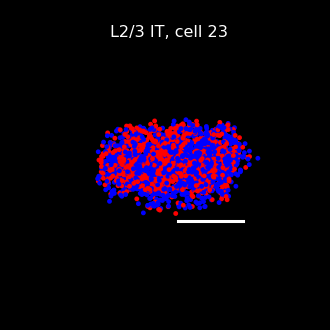

In [332]:
_cell_type = 'L2/3 IT'
_cell_ind = 23
figure_width = 3
figure_dpi=100
background_color = [0,0,0]
import matplotlib
from ImageAnalysis3.structure_tools.distance import sort_mouse_chr
cmap = copy.copy(cm.Spectral)
chr_2_color = {_key:cmap((sort_mouse_chr(_key)-1)/20) for _key in sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))}

# select cell
plt.style.use('dark_background')
#plt.style.use('default')


_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
save_plot = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           c=chr_2_AB[_chr][_valid_inds],cmap='bwr',
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        #_ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
        #                    =chr_2_AB[_chr][_valid_inds],cmap='bwr', linewidth=0.75, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.99, -plot_radius*0.99], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
#bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
#bounds.append(np.max(bounds)+1)
#bounds = np.sort(bounds)
#norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
#cbar_shrink = 0.8
#m = cm.ScalarMappable(cmap=cmap, norm=norm)
#cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
#                    ticks=bounds[:-1]+0.5,
#                    boundaries=bounds,
#                    shrink=cbar_shrink)
#cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
#cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))
if save_plot:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
                transparent=True)
#fig.show()

<IPython.core.display.Javascript object>


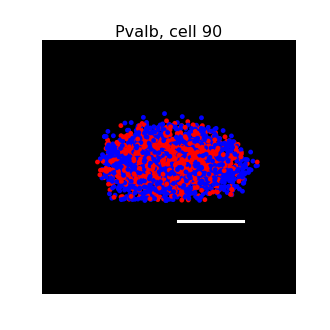

In [266]:
_cell_type = 'Pvalb'
_cell_ind = 90
figure_width = 3
figure_dpi=100
background_color = [0,0,0]
import matplotlib
from ImageAnalysis3.structure_tools.distance import sort_mouse_chr
cmap = copy.copy(cm.Spectral)
chr_2_color = {_key:cmap((sort_mouse_chr(_key)-1)/20) for _key in sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))}

# select cell
#plt.style.use('dark_background')
plt.style.use('default')


_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
save_plot = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           c=chr_2_AB[_chr][_valid_inds],cmap='bwr',
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        #_ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
        #                    =chr_2_AB[_chr][_valid_inds],cmap='bwr', linewidth=0.75, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.99, -plot_radius*0.99], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
#bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
#bounds.append(np.max(bounds)+1)
#bounds = np.sort(bounds)
#norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
#cbar_shrink = 0.8
#m = cm.ScalarMappable(cmap=cmap, norm=norm)
#cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
#                    ticks=bounds[:-1]+0.5,
#                    boundaries=bounds,
#                    shrink=cbar_shrink)
#cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
#cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))
if save_plot:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
                transparent=True)
#fig.show()

<IPython.core.display.Javascript object>


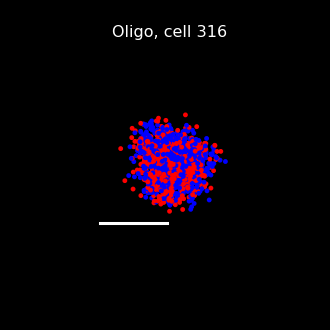

In [334]:
_cell_type = 'Oligo'
_cell_ind = 316
figure_width = 3
figure_dpi=100
background_color = [0,0,0]
import matplotlib
from ImageAnalysis3.structure_tools.distance import sort_mouse_chr
cmap = copy.copy(cm.Spectral)
chr_2_color = {_key:cmap((sort_mouse_chr(_key)-1)/20) for _key in sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))}

# select cell
plt.style.use('dark_background')
#plt.style.use('default')


_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
save_plot = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           c=chr_2_AB[_chr][_valid_inds],cmap='bwr',
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        #_ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
        #                    =chr_2_AB[_chr][_valid_inds],cmap='bwr', linewidth=0.75, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.99, -plot_radius*0.99], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
#bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
#bounds.append(np.max(bounds)+1)
#bounds = np.sort(bounds)
#norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
#cbar_shrink = 0.8
#m = cm.ScalarMappable(cmap=cmap, norm=norm)
#cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
#                    ticks=bounds[:-1]+0.5,
#                    boundaries=bounds,
#                    shrink=cbar_shrink)
#cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
#cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))
if save_plot:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
                transparent=True)
#fig.show()

In [242]:
def Centering_Chr2ZxysListDict(chr_2_zxys_list):
    # center
    
    _all_zxys = []
    for _zxys_list in chr_2_zxys_list.values():
        _all_zxys.extend(list(_zxys_list))
    _center = np.nanmean(np.concatenate(_all_zxys), axis=0)
    _centered_dict = {}
    for _chr, _zxys_list in chr_2_zxys_list.items():
        _centered_dict[_chr] = _zxys_list - _center[np.newaxis,:]
        
    return _centered_dict


In [290]:
from scipy.spatial import ConvexHull

In [303]:
_class_2_volumes = {}
for _cls in zxys_dict.keys():
    _volumes = []
    for _dict in zxys_dict[_cls]:
        _cell_zxys = np.concatenate([_v.reshape(-1, 3) for _k,_v in _dict.items()])
        _cell_valid_zxys = _cell_zxys[np.isnan(_cell_zxys).any(1)==False]
        _hull = ConvexHull(_cell_valid_zxys)
        _volumes.append(_hull.volume/1e9)
    _class_2_volumes[_cls] = _volumes

In [323]:
from matplotlib.cm import Spectral

<IPython.core.display.Javascript object>


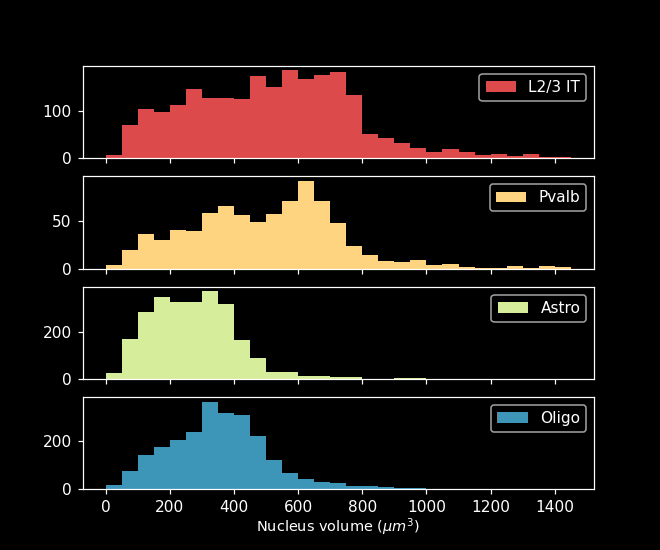

In [328]:
sel_keys = ['L2/3 IT', 'Pvalb', 'Astro', 'Oligo']
plt.style.use('dark_background')

fig, axes = plt.subplots(len(sel_keys),1, figsize=(6,5), sharex=True, sharey=False, dpi=100)

for _i, _ax in enumerate(axes):
    _key = sel_keys[_i]
    _ax.hist(_class_2_volumes[_key], bins=np.arange(0,1500,50), 
             alpha=1, label=f'{_key}', color=Spectral((_i+0.5)/len(sel_keys)))
    _ax.legend()
# get ticks
_ax.set_xlabel(f"Nucleus volume ($\u03BCm^3$)", fontsize=_font_size+2, labelpad=1)
fig.savefig(os.path.join(figure_folder, f'volume_{len(sel_keys)}types.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'volume_{len(sel_keys)}types.png'), transparent=True, dpi=300)
plt.show()

In [329]:
figure_folder

'D:\\20220626-Plots'

<IPython.core.display.Javascript object>


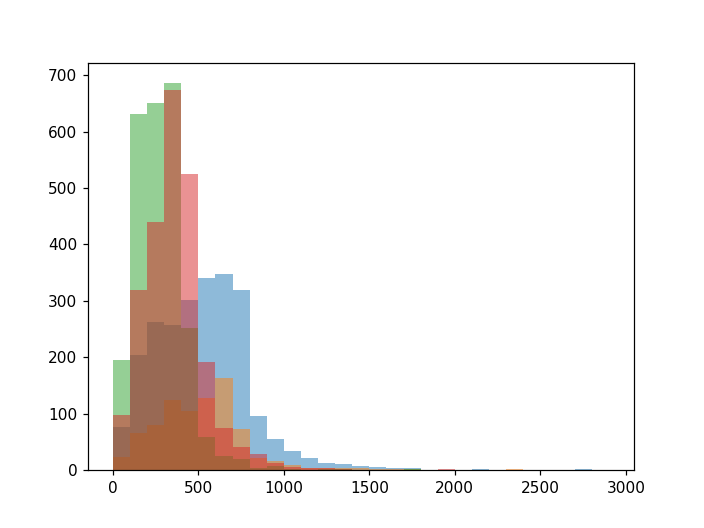

(array([ 97., 320., 440., 674., 525., 192.,  74.,  40.,  28.,  12.,   5.,
          4.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900]),
 <BarContainer object of 29 artists>)

In [317]:
plt.figure()
plt.hist(_class_2_volumes['L2/3 IT'], bins=np.arange(0,3000,100), alpha=0.5)

plt.hist(_class_2_volumes['Pvalb'], bins=np.arange(0,3000,100), alpha=0.5)

plt.hist(_class_2_volumes['Astro'], bins=np.arange(0,3000,100), alpha=0.5)

plt.hist(_class_2_volumes['Oligo'], bins=np.arange(0,3000,100), alpha=0.5)

In [297]:
_hull.volume

328796558188.01587